In [22]:
%pip install yfinance finta Jinja2

     ---------------------------------------- 0.0/133.1 kB ? eta -:--:--
     --------------------------- ----------- 92.2/133.1 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 133.1/133.1 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tickerData import *
from mlAlgorithms import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = getTickerData(ticker="btc-usd", period="max", interval="1d")
df.drop(columns={'Adj Close'}, inplace=True)
df.rename(columns={'Date':'date', 'Open':'open', 'High':'high','Low':'low', 'Close':'close', 'Volume':'volume'}, inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,date,open,high,low,close,volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...,...
3092,2023-03-06,22436.816406,22584.292969,22331.314453,22429.757812,17353192895
3093,2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22765452204
3094,2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,22536575684
3095,2023-03-09,21720.080078,21802.716797,20210.306641,20363.021484,30364664171


In [11]:
indicators = ['SMA', 'EMA', 'HMA', 'RSI', 'MACD', 'BBANDS']
df = getTickerIndicatorData(df, indicators, dropna=True)
df

,date,open,high,low,close,volume,14 period RSI,MACD,SIGNAL,14 period STOCH %K,...,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol
14,2014-10-01,387.427002,391.378998,380.779999,383.614990,26229400,32.933732,-5.171680,-3.273313,13.442449,...,-1.344576e+08,-91.005281,-5.601290,1.241264,0.772029,0.948801,0.952890,0.956293,0.971897,0.929519
15,2014-10-02,383.988007,385.497009,372.946014,375.071991,21777700,30.453554,-5.868238,-3.807329,4.085578,...,-1.562353e+08,-110.650886,-3.589058,1.250696,0.858926,0.932542,0.937215,0.941098,0.958656,0.804097
16,2014-10-03,375.181000,377.695007,357.859009,359.511993,30901200,26.534065,-7.289559,-4.519819,1.974939,...,-1.871365e+08,-144.056016,-1.764739,1.191966,0.897880,0.900411,0.905995,0.910667,0.932081,1.113566
17,2014-10-04,359.891998,364.487000,325.885986,328.865997,47236500,20.843957,-10.220799,-5.680932,2.576281,...,-2.343730e+08,-195.797889,-3.109642,1.220771,0.759753,0.833266,0.840297,0.846285,0.874957,1.517673
18,2014-10-05,328.915985,341.800995,289.295990,320.510010,83308096,19.609190,-12.885194,-7.142853,20.500336,...,-3.176811e+08,-213.972636,-4.248083,1.235700,0.653301,0.821750,0.830594,0.838187,0.874894,2.077372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,2023-03-06,22436.816406,22584.292969,22331.314453,22429.757812,17353192895,43.497180,-52.088259,186.893195,7.882087,...,1.112368e+12,-127.113420,-4.662568,1.266953,0.825046,1.054383,0.992192,0.975612,0.976922,0.874537
3093,2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22765452204,41.600970,-109.951179,127.524320,8.142203,...,1.089603e+12,-130.109653,-5.368894,1.298255,0.748826,1.043601,0.983668,0.968643,0.973002,1.119805
3094,2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,22536575684,37.405458,-194.053181,63.208820,0.350180,...,1.067066e+12,-144.737758,-4.682763,1.260815,0.770810,1.019637,0.963146,0.950144,0.958858,1.088848
3095,2023-03-09,21720.080078,21802.716797,20210.306641,20363.021484,30364664171,28.921326,-365.829474,-22.598839,3.922405,...,1.036702e+12,-201.910518,-8.514811,1.302249,0.619798,0.956844,0.907049,0.897391,0.914420,1.361107


In [12]:
df2 = produce_prediction(df, 14, dropna=True, removeohl=True)
df2

,date,close,volume,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,14 period ATR,MOM,...,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol,pred
14,2014-10-01,383.614990,26229400,32.933732,-5.171680,-3.273313,13.442449,-1.022057e+08,22.595568,-15.206024,...,-91.005281,-5.601290,1.241264,0.772029,0.948801,0.952890,0.956293,0.971897,0.929519,1.0
15,2014-10-02,375.071991,21777700,30.453554,-5.868238,-3.807329,4.085578,-1.166056e+08,20.332781,-27.080017,...,-110.650886,-3.589058,1.250696,0.858926,0.932542,0.937215,0.941098,0.958656,0.804097,1.0
16,2014-10-03,359.511993,30901200,26.534065,-7.289559,-4.519819,1.974939,-1.423567e+08,18.656568,-76.278992,...,-144.056016,-1.764739,1.191966,0.897880,0.900411,0.905995,0.910667,0.932081,1.113566,1.0
17,2014-10-04,328.865997,47236500,20.843957,-10.220799,-5.680932,2.576281,-1.822998e+08,19.027141,-94.338989,...,-195.797889,-3.109642,1.220771,0.759753,0.833266,0.840297,0.846285,0.874957,1.517673,1.0
18,2014-10-05,320.510010,83308096,19.609190,-12.885194,-7.142853,20.500336,-1.665553e+08,21.402856,-91.063995,...,-213.972636,-4.248083,1.235700,0.653301,0.821750,0.830594,0.838187,0.874894,2.077372,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,2023-02-20,24829.148438,28987376573,66.127944,729.936592,595.598717,91.699338,4.168342e+12,855.314872,3177.964844,...,115.982973,7.101560,0.841230,1.103211,1.202554,1.124121,1.090061,1.046405,1.034608,0.0
3079,2023-02-21,24436.353516,31252098714,62.089375,737.569296,623.992832,81.008217,4.153011e+12,881.869978,2565.478516,...,103.876282,7.316182,0.852920,1.116968,1.179286,1.101015,1.067634,1.024753,1.094383,0.0
3080,2023-02-22,24188.843750,30199996781,59.618588,715.399618,642.274189,74.271478,4.162531e+12,895.524275,2400.640625,...,64.085174,6.102261,0.911913,1.072840,1.163523,1.085430,1.052832,1.011949,1.047495,0.0
3081,2023-02-23,23947.492188,30476264066,57.227131,670.624394,647.944230,67.702353,4.149655e+12,870.931920,2139.390625,...,57.654391,8.036838,0.870775,1.157462,1.148493,1.070968,1.039394,1.001543,1.047117,0.0


In [13]:
df2.corr().style.background_gradient(cmap='coolwarm')

,close,volume,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,14 period ATR,MOM,14 period MFI,ROC,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol,pred
close,1.000000,0.714834,-0.031114,0.157654,0.170361,-0.004466,0.881928,0.898067,0.077795,-0.069992,0.012936,0.928937,-0.038567,-0.016901,0.036016,-0.030990,0.056607,0.025458,0.016224,0.004538,-0.014449,-0.141562
volume,0.714834,1.000000,0.005612,0.172535,0.199524,0.008973,0.699070,0.706315,0.039405,-0.044612,0.025126,0.797857,-0.017173,-0.037611,-0.004953,-0.021222,0.094536,0.055749,0.035491,-0.007483,0.171646,-0.061362
14 period RSI,-0.031114,0.005612,1.000000,0.527266,0.445782,0.809139,-0.099948,-0.095408,0.518710,0.780311,0.812268,-0.021946,0.862219,0.468724,-0.875895,0.864773,0.737997,0.887402,0.916758,0.842823,0.200654,0.086168
MACD,0.157654,0.172535,0.527266,1.000000,0.961417,0.335399,-0.015824,0.038891,0.643321,0.441133,0.491019,0.126394,0.377189,0.706652,-0.430910,0.428328,0.622468,0.649476,0.612739,0.412550,0.086759,0.019196
SIGNAL,0.170361,0.199524,0.445782,0.961417,1.000000,0.219424,-0.015927,0.086810,0.434952,0.326516,0.357550,0.129639,0.263460,0.544722,-0.332066,0.322181,0.609319,0.589890,0.525096,0.283308,0.070903,0.018608
14 period STOCH %K,-0.004466,0.008973,0.809139,0.335399,0.219424,1.000000,-0.048113,-0.064813,0.515153,0.703952,0.729771,0.000002,0.867775,0.405488,-0.751924,0.771540,0.489926,0.647791,0.718719,0.798206,0.148837,0.065170
MFV,0.881928,0.699070,-0.099948,-0.015824,-0.015927,-0.048113,1.000000,0.744417,-0.009246,-0.120057,-0.061011,0.944030,-0.074315,-0.080940,0.081408,-0.073821,-0.136385,-0.102561,-0.087470,-0.057333,-0.027738,-0.093159
14 period ATR,0.898067,0.706315,-0.095408,0.038891,0.086810,-0.064813,0.744417,1.000000,-0.069996,-0.132322,-0.059965,0.820311,-0.113110,-0.185986,0.099063,-0.103261,0.089184,-0.017616,-0.050745,-0.079244,-0.040615,-0.110008
MOM,0.077795,0.039405,0.518710,0.643321,0.434952,0.515153,-0.009246,-0.069996,1.000000,0.499445,0.623129,0.076147,0.511062,0.754785,-0.460728,0.481431,0.420887,0.538129,0.583761,0.601307,0.080889,0.015111
14 period MFI,-0.069992,-0.044612,0.780311,0.441133,0.326516,0.703952,-0.120057,-0.132322,0.499445,1.000000,0.745079,-0.072797,0.742355,0.484416,-0.871574,0.868403,0.505895,0.663311,0.714082,0.672124,0.172157,0.144568


In [14]:
features = StandardScaler().fit_transform(df2[df2.columns.difference(['pred', 'date'])])
target = df2['pred']

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.4, shuffle=False)
X_train.shape

(1840, 21)

{'n_neighbors': 23}
              precision    recall  f1-score   support

         0.0       0.49      0.67      0.57       563
         1.0       0.59      0.40      0.48       665

    accuracy                           0.53      1228
   macro avg       0.54      0.54      0.52      1228
weighted avg       0.55      0.53      0.52      1228

{'C': 0.9, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

         0.0       0.49      0.86      0.62       563
         1.0       0.67      0.25      0.36       665

    accuracy                           0.53      1228
   macro avg       0.58      0.55      0.49      1228
weighted avg       0.59      0.53      0.48      1228

{'n_estimators': 110}
              precision    recall  f1-score   support

         0.0       0.49      0.78      0.60       563
         1.0       0.63      0.32      0.43       665

    accuracy                           0.53      1228
   macro avg       0.56      0.55      0.52      1228
we

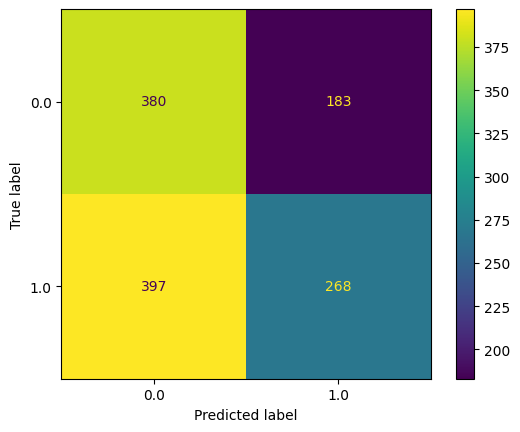

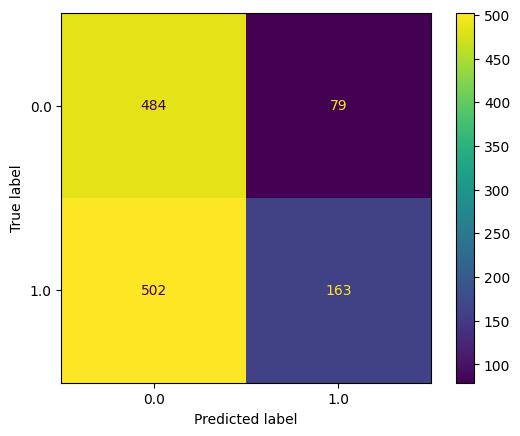

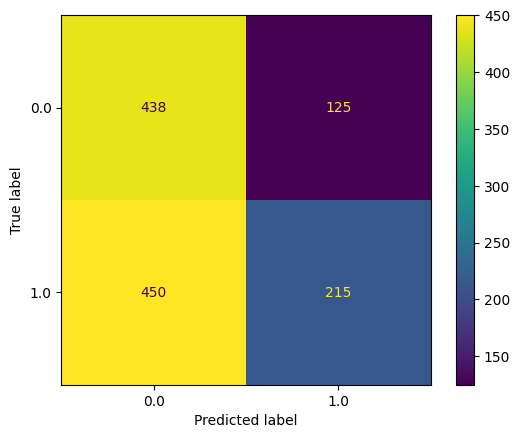

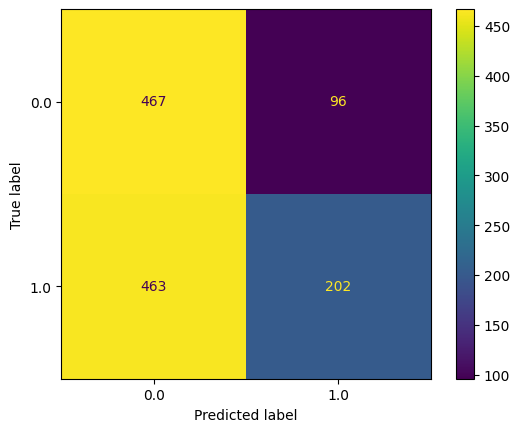

In [15]:
knn = trained_KNN(X_train, X_test, Y_train, Y_test)
lr = trained_LogisticRegression(X_train, X_test, Y_train, Y_test)
rfc = trained_RandomForestClassifier(X_train, X_test, Y_train, Y_test)
vc = trained_VotingClassifier(lr, knn, rfc, X_train, X_test, Y_train, Y_test)

In [16]:
print('knn -', metrics.accuracy_score(df2['pred'], knn.predict(features)))
print('lr -', metrics.accuracy_score(df2['pred'], lr.predict(features)))
print('rfc -', metrics.accuracy_score(df2['pred'], rfc.predict(features)))
print('vc -', metrics.accuracy_score(df2['pred'], vc.predict(features)))

knn - 0.636897001303781
lr - 0.5896349413298566
rfc - 0.5915906127770535
vc - 0.6192959582790091
